# Naive Bayes Classifier for Email Classification

## Overview

This repository contains a simple implementation of a Naive Bayes Classifier for classifying emails as either "ham" (non-spam) or "spam." The Naive Bayes Classifier is a probabilistic algorithm that uses Bayes' theorem with the "naive" assumption of independence between features. 

##  How it Works

The classifier works by learning from a labeled dataset of emails. It analyzes the words and features in these emails to calculate the probability that a given email is spam or ham. Here's an overview of the process:

* Data Preprocessing:

The training data should be preprocessed to remove stop words, punctuation, and other noise.
Text data is tokenized into words or n-grams.
Feature extraction: Convert text data into numerical features (e.g., using TF-IDF or bag-of-words).

* Training:

The Naive Bayes Classifier calculates probabilities for each word or feature in the training data.
It computes the prior probabilities of spam and ham emails.

* Classification:

To classify a new email, the classifier calculates the probability that it belongs to each class (spam or ham) based on the words or features in the email.
The email is assigned to the class with the highest probability.

* Evaluation:

The classifier's performance is evaluated using metrics such as accuracy, precision, recall, and F1-score on a separate test dataset.

In [138]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [142]:
# Load the dataset
message_data = pd.read_csv('spam.csv')
message_data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [143]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(message_data['Message'], message_data['Category'], test_size=0.2, random_state=42)

# Initialize a CountVectorizer to convert text to numerical features
vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [144]:
# Initialize a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test_vectorized)


In [145]:
# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.9865470852017937
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.97      0.93      0.95       149

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



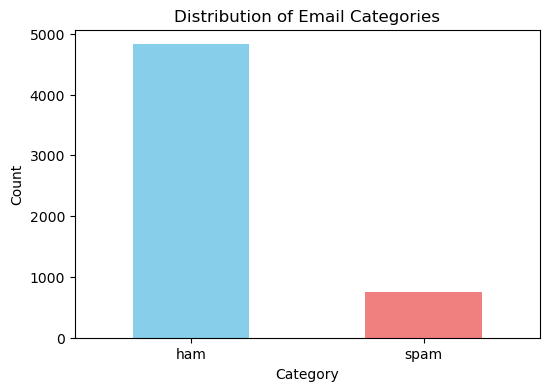

In [146]:
# Create a bar chart to show the distribution of categories
category_counts = message_data['Category'].value_counts()
plt.figure(figsize=(6, 4))
category_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Email Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

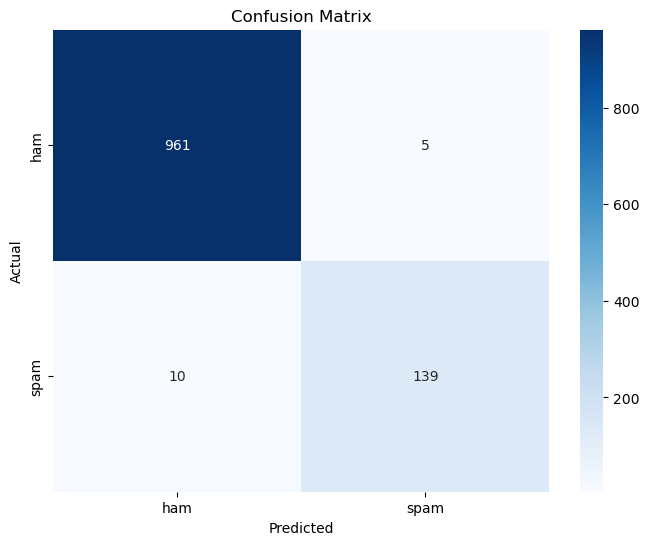

In [147]:
# Create a confusion matrix heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [148]:
# Function to predict email category
def predict_email_category(email_text):
    email_vectorized = vectorizer.transform([email_text])
    prediction = nb_classifier.predict(email_vectorized)
    return prediction[0]

In [149]:
# Example usage
user_email = "You are the winner of the last competition!! Please click the link below to get the price"
prediction = predict_email_category(user_email)

if prediction == 'ham':
    print("The email is categorized as 'ham' (not spam).")
else:
    print("The email is categorized as 'spam'.")

The email is categorized as 'spam'.


# Conclusion
This Naive Bayes Classifier for email classification is a basic example of text classification using machine learning. You can further enhance its performance by experimenting with different preprocessing techniques, feature extraction methods, and hyperparameter tuning.

Feel free to contribute, report issues, or suggest improvements to this repository.